# Introduction

In today’s digital world, users are overwhelmed with the abundance of movie choices available across various platforms. As a result, deciding what to watch next has become increasingly difficult. Movie Recommendation Systems offer a practical solution to this issue by helping users discover movies tailored to their preferences, based on data and intelligent algorithms.

This project aims to build a Content-Based Movie Recommendation System that suggests similar movies to a given title using various metadata features such as genre, overview, cast, crew, and keywords. The recommendations are based on the similarity between movies, allowing the system to offer personalized suggestions without the need for explicit user ratings or interaction history.

# Technologies and Tools Used

This project leverages the following tools and technologies: Python: Core programming language used for data processing and model development Pandas: For data cleaning, exploration, and manipulation of movie metadata NumPy: For numerical operations and efficient array handling Scikit-learn: For feature extraction (e.g., TF-IDF Vectorization) and similarity measurement using cosine similarity Natural Language Processing (NLP): To process and vectorize text data such as movie overviews and keywords Jupyter Notebook: For interactive development and visualization Matplotlib/Seaborn (optional): For data visualization and understanding patterns.

# Data Descriptions

### All the features in the data set are defined as follows:



##### 1.adult : Indicates whether the movie is for adults (True or False).
##### 2.belongs_to_collection : Contains information about the collection or franchise the movie belongs to (if any), represented as a dictionary-like string.
##### 3.budget : The budget of the movie in USD (as a string or numeric value).
##### 4.genres : A list of genre objects (each with id and name) associated with the movie.
##### 5.homepage : The official website URL of the movie (if available).
##### 6.id : The unique identifier for the movie (may be numeric or string).
##### 7.imdb_id : The IMDb identifier of the movie (e.g., tt0114709).
##### 8.original_language : The original language in which the movie was produced (e.g., 'en' for English).
##### 9.original_title : The original title of the movie (before translation/localization).
##### 10.overview : A short summary or synopsis of the movie's plot.
##### 11.popularity : A numeric score representing the movie's popularity (used for sorting or filtering).
##### 12.poster_path : The file path to the movie’s poster image.
##### 13.production_companies : A list of production companies involved in making the movie, usually as dictionary-like strings.
##### 14.production_countries : A list of countries involved in production, also in dictionary-like format.
##### 15.release_date : The official release date of the movie (in YYYY-MM-DD format).
##### 16.revenue : The revenue generated by the movie (in USD).
##### 17.runtime : The length of the movie in minutes.
##### 18.spoken_languages : A list of spoken languages in the movie, represented as dictionaries.
##### 19.status : The release status of the movie (e.g., Released, Post Production).
##### 20.tagline : A short marketing tagline or catchphrase for the movie.
##### 21.title : The title of the movie (may differ from the original title due to localization).
##### 22.video : Indicates whether the entry is a video (True or False).
##### 23.vote_average : The average user rating for the movie (on a scale, typically out of 10).
##### 24.vote_count : The total number of votes or ratings the movie has received.


In [6]:
# Installing neccessary libraries here
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn

In [7]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import ast  # for parsing genre strings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
# Load the movie metadata CSV file
df = pd.read_csv("movies_metadata.csv", low_memory=False)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [9]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [10]:
#checking all the columns from datasets
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
# We only need title, genres, vote_average, and popularity for this project
movies = df[['title', 'genres', 'vote_average', 'popularity',]].copy()
print(movies)

                             title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
45461                       Subdue   
45462          Century of Birthing   
45463                     Betrayal   
45464             Satan Triumphant   
45465                     Queerama   

                                                  genres  vote_average  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...           7.7   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...           6.9   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...           6.5   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           6.1   
4                         [{'id': 35, 'name': 'Comedy'}]           5.7   
...                                                  ...           ...   
45461  [{'id': 18, 'name'

In [12]:
# Drop rows with missing values in important columns
movies = movies.dropna(subset=['genres', 'vote_average', 'popularity',])
print(movies)


                             title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
45461                       Subdue   
45462          Century of Birthing   
45463                     Betrayal   
45464             Satan Triumphant   
45465                     Queerama   

                                                  genres  vote_average  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...           7.7   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...           6.9   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...           6.5   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...           6.1   
4                         [{'id': 35, 'name': 'Comedy'}]           5.7   
...                                                  ...           ...   
45461  [{'id': 18, 'name'

In [13]:

# Extract genre names from JSON-like string
def parse_genres(genre_str):
    """Converts a string of genre dictionaries into a list of genre names."""
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

# Apply the parsing function to each row
movies['genre_list'] = movies['genres'].apply(parse_genres)
print(movies['genre_list'])


0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genre_list, Length: 45460, dtype: object


In [14]:
genre_counts = movies['genre_list'].explode().value_counts().sort_values(ascending=False)
print(genre_counts)

genre_list
Drama              20264
Comedy             13182
Thriller            7623
Romance             6735
Action              6594
Horror              4672
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3047
Family              2770
Mystery             2467
Fantasy             2313
Animation           1934
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             766
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_4160\2745299451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


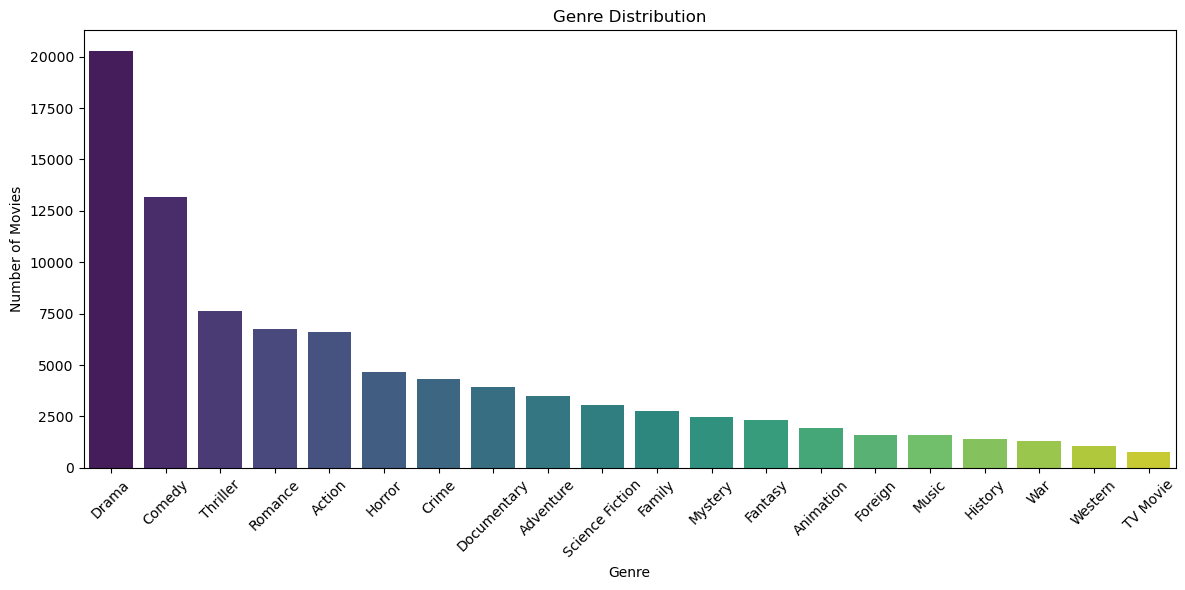

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

In [16]:
# This turns genre lists into binary features
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
print(genre_df)

       Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
0           0          0          1       1      0            0      0   
1           0          1          0       0      0            0      0   
2           0          0          0       1      0            0      0   
3           0          0          0       1      0            0      1   
4           0          0          0       1      0            0      0   
...       ...        ...        ...     ...    ...          ...    ...   
45455       0          0          0       0      0            0      1   
45456       0          0          0       0      0            0      1   
45457       1          0          0       0      0            0      1   
45458       0          0          0       0      0            0      0   
45459       0          0          0       0      0            0      0   

       Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0           1        0        0   

In [17]:
# We scale vote_average and popularity to range [0, 1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(movies[['vote_average', 'popularity']])
scaled_df = pd.DataFrame(scaled_features, columns=['vote_average', 'popularity'])
print(scaled_df)


       vote_average  popularity
0              0.77    0.040087
1              0.69    0.031079
2              0.65    0.021394
3              0.61    0.007049
4              0.57    0.015320
...             ...         ...
45455          0.40    0.000132
45456          0.90    0.000326
45457          0.38    0.001649
45458          0.00    0.000006
45459          0.00    0.000298

[45460 rows x 2 columns]


In [18]:
#Combine all features into one matrix
final_features = pd.concat([genre_df, scaled_df], axis=1)
print(final_features)

       Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
0           0          0          1       1      0            0      0   
1           0          1          0       0      0            0      0   
2           0          0          0       1      0            0      0   
3           0          0          0       1      0            0      1   
4           0          0          0       1      0            0      0   
...       ...        ...        ...     ...    ...          ...    ...   
45455       0          0          0       0      0            0      1   
45456       0          0          0       0      0            0      1   
45457       1          0          0       0      0            0      1   
45458       0          0          0       0      0            0      0   
45459       0          0          0       0      0            0      0   

       Family  Fantasy  Foreign  ...  Music  Mystery  Romance  \
0           1        0        0  ...      0   

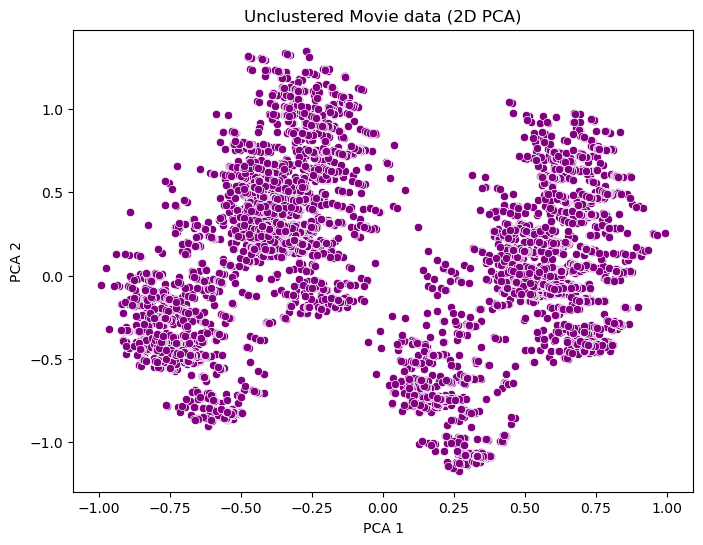

In [19]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], color='purple')
plt.title('Unclustered Movie data (2D PCA)')
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.show()

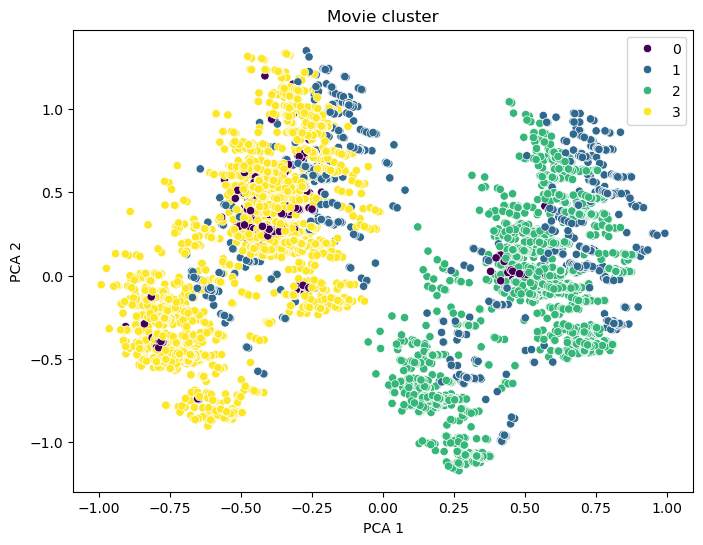

In [20]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

kmean = KMeans(n_clusters=4, random_state=42)
clusters = kmean.fit_predict(final_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], hue=clusters,palette='viridis')
plt.title('Movie cluster')
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.show()

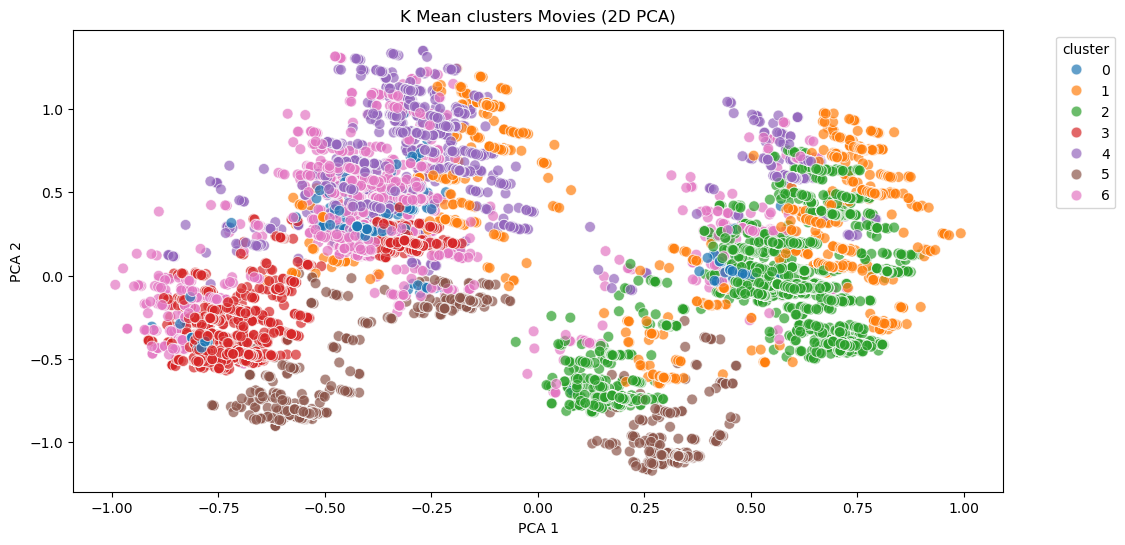

In [21]:
# Fit and assign clusters 
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies['cluster'] = kmeans.fit_predict(final_features)

#plot Scatter with cluster color
plt.figure(figsize=(12, 6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], 
                hue=movies['cluster'],palette='tab10',s=60,
               alpha=0.7)
plt.title('K Mean clusters Movies (2D PCA)')
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\4008291381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['cluster'], palette='coolwarm')


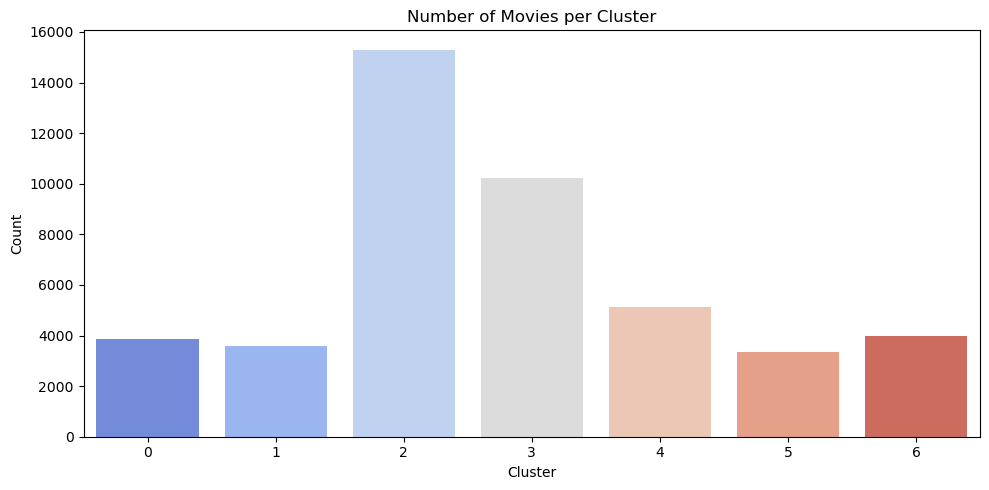

In [22]:
# Fit KMeans using chosen k (replace with optimal k from elbow plot)
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies['cluster'] = kmeans.fit_predict(final_features)

# Plot how many movies per cluster
plt.figure(figsize=(10, 5))
sns.countplot(x=movies['cluster'], palette='coolwarm')
plt.title('Number of Movies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
#Define recommendation function
def recommend_movies(movie_title, n=5):
    """
    Recommend similar movies based on genre, popularity, and rating using clustering.
    
    Parameters:
        movie_title (str): Title of the movie to base recommendations on.
        n (int): Number of similar movies to return.
        
    Returns:
        pd.DataFrame: Top N recommended movies in the same cluster.
    """
    # Lowercase comparison for robust matching
    target = movies[movies['title'].str.lower() == movie_title.lower()]
    
    if target.empty:
        return f" Movie titled '{movie_title}' not found in dataset."
    
    # Get the cluster of the target movie
    cluster_id = target['cluster'].values[0]
    
    # Get all movies from the same cluster
    similar_movies = movies[(movies['cluster'] == cluster_id) & 
                            (movies['title'].str.lower() != movie_title.lower())]
    
    # Return top N based on vote_average and popularity
    return similar_movies[['title', 'vote_average', 'popularity']].sort_values(
        by=['vote_average', 'popularity'], ascending=False).head(n)


# Example usage:

print(" Recommended movies similar to 'Toy Story':")
print(recommend_movies("Heat", n=20))

 Recommended movies similar to 'Toy Story':
                                     title  vote_average popularity
25565                    The Walking Stick          10.0   0.584448
394                   Girl in the Cadillac          10.0   0.405392
24951                 Deliver Us from Evil          10.0   0.317373
39707                     American Hostage          10.0    0.11167
22346                       هیچ کجا هیچ کس          10.0   0.070407
25355                 The Great Kidnapping          10.0   0.049823
41698  Paradies 505. Ein Niederbayernkrimi          10.0   0.048331
22418                                 Gold           9.0   0.259029
25895                             Poolside           9.0   0.088651
26074               Die zwölf Geschworenen           9.0   0.074898
43274                           London Spy           8.8     1.1196
39159                           Confession           8.8   0.455081
44612                Extraordinary Mission           8.7   2.552316
314 